In [1]:
# 1. Impor Library yang Diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from sklearn.metrics import r2_score, mean_squared_error
import math

In [2]:
# 2. Load Dataset dan Persiapan Data
df_original = pd.read_csv('dataset_herbamate.csv')

# Ganti koma dengan titik dan konversi kolom 'relevance_score' menjadi float
df = df_original.copy()
df['relevance_score'] = df['relevance_score'].str.replace(',', '.').astype(float)

# Pastikan tidak ada nilai NaN dan menghapusnya
df_cleaned = df.dropna()

# Memisahkan 'symptoms' menjadi list dan menerapkan MultiLabelBinarizer
mlb = MultiLabelBinarizer()
symptoms = df_cleaned['symptoms'].str.split(',')

# Transformasi symptoms menjadi format binary
symptom_matrix = mlb.fit_transform(symptoms)

# Membuat DataFrame untuk matrix symptoms
symptom_df = pd.DataFrame(symptom_matrix, columns=mlb.classes_)

# Gabungkan dengan dataset asli
df_symptoms = pd.concat([df_cleaned, symptom_df], axis=1)

# Drop kolom 'symptoms' yang asli
df_symptoms = df_symptoms.drop('symptoms', axis=1)

# Cek data setelah pembersihan
print(df_symptoms.head())


  herbs                                       usage_method  relevance_score  \
0  Adas  Rebus 1-2 sendok teh biji adas dalam 1,5 gelas...              0.7   
1  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.6   
2  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.8   
3  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.9   
4  Adas  Seduh 1-2 sendok teh biji adas dalam segelas a...              1.0   

   Batuk  Bau badan  Bau mulut  Darah tinggi  Dehidrasi  Demam  Diare  ...  \
0      1          0          0             0          0      0      0  ...   
1      0          0          0             0          0      0      0  ...   
2      0          0          0             0          0      0      0  ...   
3      0          0          0             0          0      0      0  ...   
4      0          0          0             0          0      0      0  ...   

   Sakit kepala  Sakit perut  Sakit tenggorokan  Sariawa

In [3]:
# 3. Memisahkan Fitur dan Target
X = df_symptoms.drop(['herbs', 'usage_method'], axis=1)
y = df_symptoms['relevance_score']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan data sudah dalam format numerik
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Cek bentuk data
print(X_train.shape, y_train.shape)


(800, 45) (800,)


In [4]:
# 4. Membangun Model Neural Network
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(hidden_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Kompilasi model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Ringkasan model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3288 - mae: 0.5370 - val_loss: 0.0346 - val_mae: 0.1497
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mae: 0.1205 - val_loss: 0.0146 - val_mae: 0.1000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - mae: 0.0916 - val_loss: 0.0066 - val_mae: 0.0616
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mae: 0.0613 - val_loss: 0.0046 - val_mae: 0.0525
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mae: 0.0521 - val_loss: 0.0038 - val_mae: 0.0475
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0485 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mae: 0.0424 - val_loss: 0.0029 - val_mae: 0.0414
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0026 - val_mae: 0.0379
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mae: 

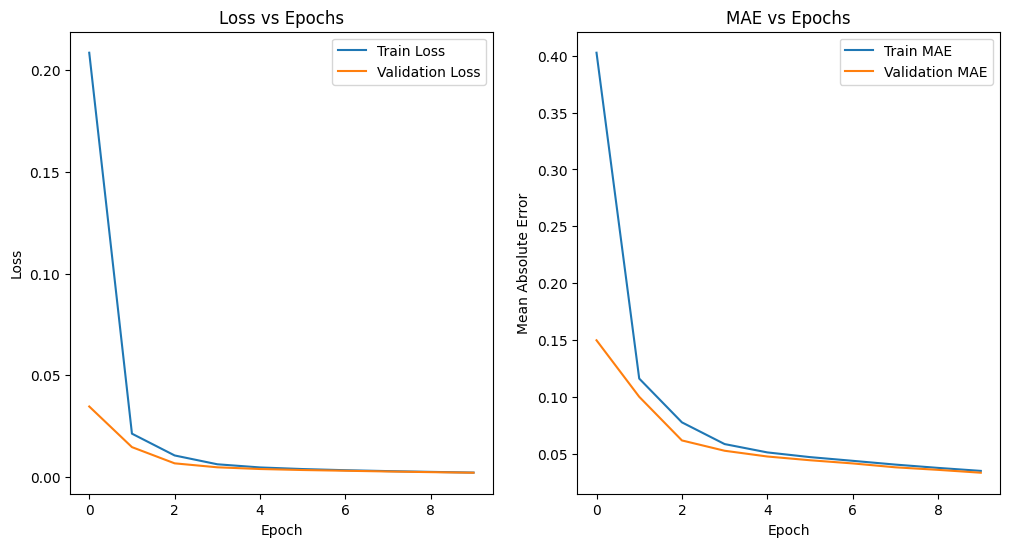

In [5]:
# 5. Melatih Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Menyimpan model yang telah dilatih
model.save('herb_recommendation_model.h5')

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


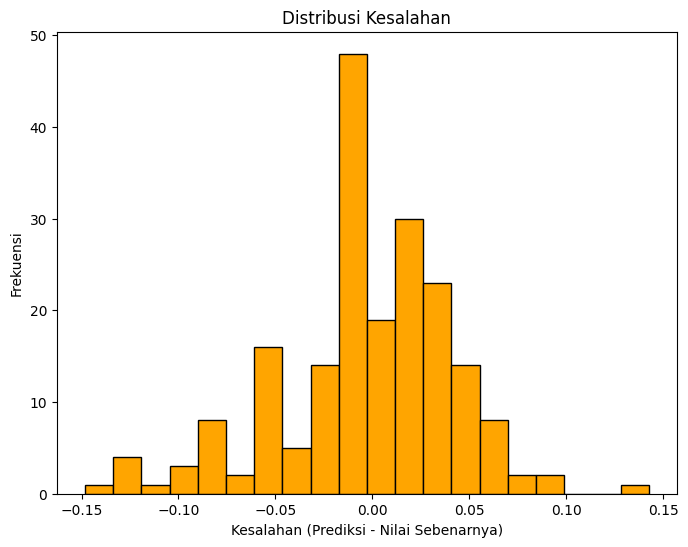

R-squared: 0.8549556335891575
Mean Squared Error (MSE): 0.00197266226112635
Root Mean Squared Error (RMSE): 0.04441466268166798


In [6]:
# 6. Evaluasi Model
y_pred = model.predict(X_test)

# Pastikan y_test adalah array NumPy dan lakukan flatten()
y_test = y_test.values.flatten()  # Mengonversi ke array NumPy dan meratakan dimensi
y_pred = y_pred.flatten()  # Meratakan y_pred jika perlu

# Hitung error dan evaluasi metrik
errors = y_test - y_pred

# Visualisasi Distribusi Kesalahan (Error Distribution)
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='orange', edgecolor='black')
plt.title('Distribusi Kesalahan')
plt.xlabel('Kesalahan (Prediksi - Nilai Sebenarnya)')
plt.ylabel('Frekuensi')
plt.show()

# Evaluasi R2, MSE, dan RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [7]:
# 7. Fungsi untuk Memprediksi dan Memberikan Rekomendasi Herbal
def recommend_herbs(symptoms_input):
    # Pisahkan gejala input menjadi list
    input_symptoms = symptoms_input.split(',')

    # Transformasi input gejala ke dalam format yang sesuai dengan model
    symptoms_input_transformed = mlb.transform([input_symptoms])

    # Cek apakah jumlah fitur input sama dengan jumlah fitur model
    # Jika tidak sama, pad dengan nol (kolom yang tidak ada pada input)
    if symptoms_input_transformed.shape[1] != X_train.shape[1]:
        # Menambahkan kolom nol untuk fitur yang tidak ada pada input
        missing_cols = X_train.shape[1] - symptoms_input_transformed.shape[1]
        symptoms_input_transformed = np.pad(symptoms_input_transformed, ((0, 0), (0, missing_cols)), mode='constant')

    # Prediksi skor relevansi
    predicted_relevance_score = model.predict(symptoms_input_transformed)

    # Menambahkan kolom relevansi pada dataset herbs dan urutkan berdasarkan relevansi
    df['predicted_relevance_score'] = model.predict(X)

    # Filter hanya herbal yang relevan dengan gejala yang dimasukkan
    # Cek apakah gejala herbal cocok dengan input gejala
    df['relevant'] = df['symptoms'].apply(lambda x: any(symptom in x for symptom in input_symptoms))

    # Filter berdasarkan relevansi (hanya herbal yang memiliki gejala yang cocok)
    df_relevant = df[df['relevant'] == True]

    # Urutkan berdasarkan predicted relevance score
    df_sorted = df_relevant.sort_values(by='predicted_relevance_score', ascending=False)

    # Hapus duplikasi herbal
    df_sorted = df_sorted.drop_duplicates(subset='herbs')

    # Tampilkan top 5 rekomendasi herbal dan usage method
    top_5 = df_sorted[['herbs', 'usage_method', 'predicted_relevance_score']].head(5)

    return top_5

# Coba fungsi rekomendasi herbal dengan input gejala
symptoms_input = 'Batuk,Sakit tenggorokan,Perut kembung'
top_5_recommendations = recommend_herbs(symptoms_input)
print(top_5_recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
            herbs                                       usage_method  \
4            Adas  Seduh 1-2 sendok teh biji adas dalam segelas a...   
296        Kencur  Cuci bersih 1-2 ruas kencur segar, kunyah lang...   
214  Jintan putih  Rebus 1 sendok teh biji jintan putih dalam seg...   
331    Lada hitam  Taburkan sedikit bubuk lada hitam ke dalam air...   
947     Temulawak  Ambil 1 ruas temulawak segar, kupas dan iris t...   

     predicted_relevance_score  
4                     0.935099  
296                   0.935099  
214                   0.902375  
331                   0.865162  
947                   0.865162  


In [8]:
# Menyimpan model yang telah dilatih
model.save('herb_recommendation_model.h5')

# Cek apakah model tersimpan
print("Model saved to herb_recommendation_model.h5")


Model saved to herb_recommendation_model.h5


In [9]:
# Install Tensorflow.js

!pip install tensorflowjs

In [10]:
# Menyimpan/mengubah model .h5 ke dalam bentuk json

!tensorflowjs_converter --input_format=keras herb_recommendation_model.h5 tfjs_model

2024-12-06 04:39:08.542513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733459948.600225   15144 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733459948.614865   15144 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file
